In [602]:
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import pandas as pd
import numpy as np
import scipy.stats as stats

## Load Data & Update Labels

In [603]:
df_carbon_abund = pd.read_excel(
    "../data/processed/CascadiaMargin_carbon_abundance.xlsx"
)
df_index_vals = pd.read_excel("../data/processed/CascadiaMargin_index_values.xlsx")
df_glyc = pd.read_excel("../data/processed/CascadiaMargin_glyc_degrad_prod.xlsx")

In [604]:
df_carbon_abund["Location"] = df_carbon_abund["Location"].replace(
    {"Astoria Cyn": "Astoria Canyon", "Mcarthur cyn": "McArthur Canyon"}
)

df_index_vals["Location"] = df_index_vals["Location"].replace(
    {"Astoria Cyn": "Astoria Canyon", "Mcarthur Cyn": "McArthur Canyon"}
)

df_glyc["Location"] = df_glyc["Location"].replace(
    {"Astoria Cyn": "Astoria Canyon", "Mcarthur Cyn": "McArthur Canyon"}
)

## Merge Datasets & Filter

In [605]:
from functools import reduce

# Assume df1, df2, df3, ... are your DataFrames and you want to merge them all on 'Sample Name'
dataframes = [
    df_carbon_abund,
    df_index_vals,
    df_glyc,
]  # Add all your dataframes to this list


# Function to merge two dataframes with specified parameters
def merge_dfs(left, right):
    return pd.merge(left, right, on="Sample Name", how="outer")


# Use reduce to apply the merge function across all dataframes in the list
merge = reduce(merge_dfs, dataframes)
all_merge = merge[:-5]  # drop duplicate last 5 rows

In [606]:
# define DF to identify low size and purity score samples
low_purity_data = all_merge[all_merge["purity_score"] < 0.85]
low_size = all_merge[all_merge["avg_ugC"] < 0.90]

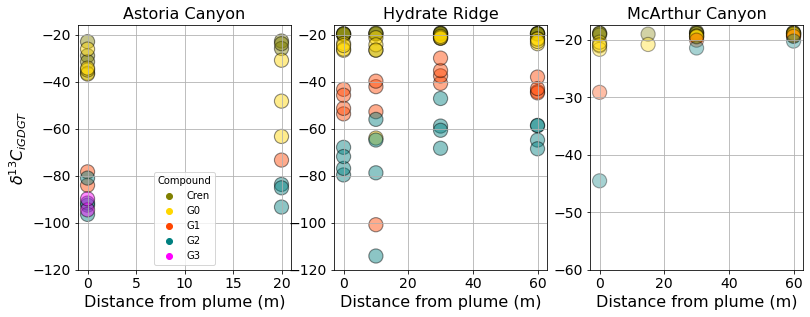

In [607]:
# filter for just compoounds with d13C measurements
df_carbon_abund = df_carbon_abund.dropna()
# sort by compound
df_carbon_abund = df_carbon_abund.sort_values("Compound")

# plot
fig, ax = plt.subplots(1, 3, figsize=(13, 4.5), facecolor="white")
ax = ax.flatten()

palette = ["olive", "gold", "orangered", "teal", "fuchsia"]
palette_o = ["olive", "gold", "orangered", "teal"]

sns.scatterplot(
    data=df_carbon_abund[df_carbon_abund["Location"] == "Astoria Canyon"],
    x="m_from_plume",
    y="d13c_avg",
    palette=palette,
    s=200,
    alpha=0.45,
    edgecolor="k",
    ax=ax[0],
    hue="Compound",
)

sns.scatterplot(
    data=df_carbon_abund[df_carbon_abund["Location"] == "Hydrate Ridge"],
    x="m_from_plume",
    y="d13c_avg",
    palette=palette_o,
    s=200,
    alpha=0.45,
    edgecolor="k",
    ax=ax[1],
    legend=False,
    hue="Compound",
)


sns.scatterplot(
    data=df_carbon_abund[df_carbon_abund["Location"] == "McArthur Canyon"],
    x="m_from_plume",
    y="d13c_avg",
    palette=palette_o,
    s=200,
    alpha=0.35,
    edgecolor="k",
    ax=ax[2],
    legend=False,
    hue="Compound",
)

titles = ["Astoria Canyon", "Hydrate Ridge", "McArthur Canyon"]
for i, j in enumerate(titles):
    ax[i].set_title(j, fontsize=16)
    ax[i].set_ylabel("$\delta$$^{13}C_{iGDGT}$", fontsize=16)
    ax[i].set_xlabel("Distance from plume (m)", fontsize=16)
    ax[i].grid("on")
    ax[i].tick_params(axis="x", labelsize=14)
    ax[i].tick_params(axis="y", labelsize=14)
    ax[i].yaxis.set_major_locator(MultipleLocator(20))
    # ax[i].set_ylim([-120,-15])
ax[1].set_ylabel(None)
ax[2].set_ylabel(None)
ax[0].set_ylim([-120, -16])
ax[1].set_ylim([-120, -16])
ax[2].set_ylim([-60, -17.5])
ax[2].yaxis.set_major_locator(MultipleLocator(10))

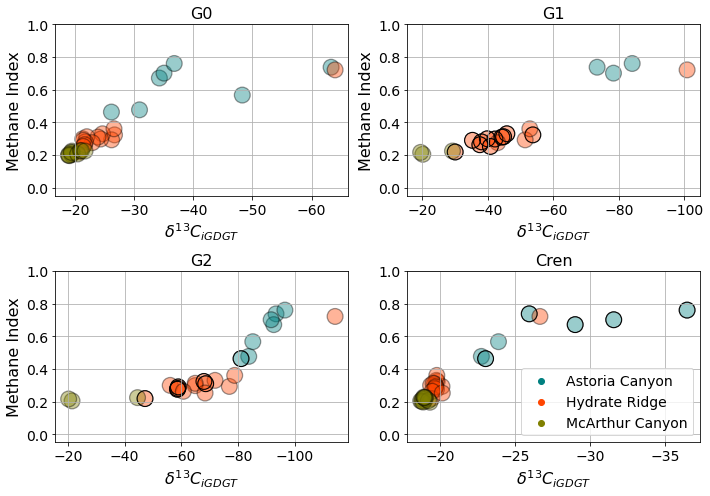

In [608]:
# Figure 3
gdgts = ["G0", "G1", "G2", "Cren"]
fig, ax = plt.subplots(2, 2, figsize=(10, 7), facecolor="white")
pal_2 = ["teal", "orangered", "olive"]
ax = ax.flatten()

for i, j in enumerate(gdgts):

    sns.scatterplot(
        data=all_merge[all_merge["Compound"] == j],
        x="d13c_avg",
        y="MI index",
        hue="Location_x",
        ax=ax[i],
        palette=pal_2,
        s=250,
        edgecolor="k",
        alpha=0.4,
    )

    # Filter the dataframe for each compound
    data = low_size[low_size["Compound"] == j]
    data_2 = low_purity_data[low_purity_data["Compound"] == j]
    locations = data["Location_x"].unique()

    # Plot each location separately to control edge and face colors
    for location in locations:
        subset = data[data["Location_x"] == location]
        ax[i].scatter(
            subset["d13c_avg"],
            subset["MI index"],
            edgecolor="black",
            facecolor="none",
            s=250,
            alpha=1,
            linewidth=1,
        )
    for location in locations:
        subset2 = data_2[data_2["Location_x"] == location]
        ax[i].scatter(
            subset2["d13c_avg"],
            subset2["MI index"],
            edgecolor="black",
            facecolor="none",
            s=250,
            alpha=1,
            linewidth=1,
        )

    # Additional customization for each subplot as needed
    ax[i].set_title(f"Compound: {j}")
    ax[i].set_xlabel("$\delta^{13}C_{iGDGT}$", fontsize=16)
    ax[i].set_ylabel("Methane Index", fontsize=16)
    ax[i].invert_xaxis()
    ax[i].tick_params(axis="x", labelsize=14)
    ax[i].tick_params(axis="y", labelsize=14)
    # ax[i].set_xlim([-120,-15])
    ax[i].set_ylim([-0.05, 1])
    ax[i].grid("on")


title = ["G0", "G1", "G2", "Cren"]
for k, l in enumerate(title):
    ax[k].set_title(l, fontsize=16)
    ax[0].legend().remove()
    ax[2].legend().remove()
    ax[1].legend().remove()
ax[3].set_ylabel(None)
ax[3].legend(fontsize=14)
plt.tight_layout()
plt.savefig("../manuscript-figures/MI_vs_d13C.png", dpi=400)

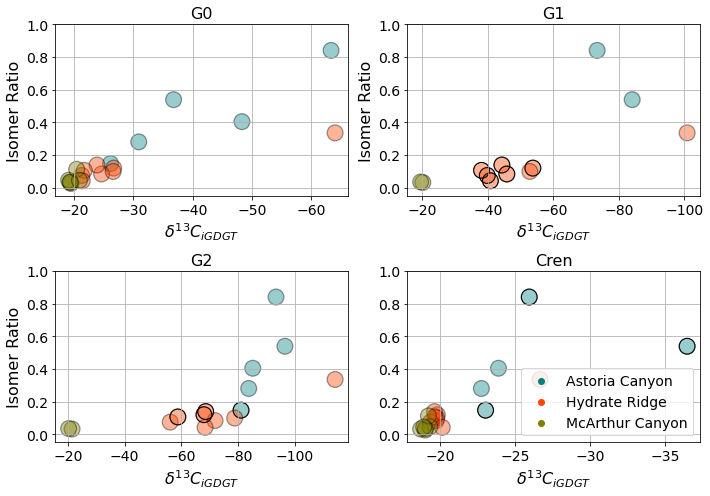

In [609]:
# Figure 4
gdgts = ["G0", "G1", "G2", "Cren"]
fig, ax = plt.subplots(2, 2, figsize=(10, 7), facecolor="white")
pal_2 = ["teal", "orangered", "olive"]
ax = ax.flatten()

for i, j in enumerate(gdgts):

    sns.scatterplot(
        data=all_merge[all_merge["Compound"] == j],
        x="d13c_avg",
        y="ratio",
        hue="Location_x",
        ax=ax[i],
        palette=pal_2,
        s=250,
        edgecolor="k",
        alpha=0.4,
    )

    # Filter the dataframe for each compound
    data = low_size[low_size["Compound"] == j]
    data_2 = low_purity_data[low_purity_data["Compound"] == j]
    locations = data["Location_x"].unique()

    # Plot each location separately to control edge and face colors
    for location in locations:
        subset = data[data["Location_x"] == location]
        ax[i].scatter(
            subset["d13c_avg"],
            subset["ratio"],
            edgecolor="black",
            facecolor="none",
            s=250,
            alpha=1,
            linewidth=1,
        )
    for location in locations:
        subset2 = data_2[data_2["Location_x"] == location]
        ax[i].scatter(
            subset2["d13c_avg"],
            subset2["ratio"],
            edgecolor="black",
            facecolor="none",
            s=250,
            alpha=1,
            linewidth=1,
        )

    # Additional customization for each subplot as needed
    ax[i].set_title(f"Compound: {j}")
    ax[i].set_xlabel("$\delta^{13}C_{iGDGT}$", fontsize=16)
    ax[i].set_ylabel("Isomer Ratio", fontsize=16)
    ax[i].invert_xaxis()
    ax[i].tick_params(axis="x", labelsize=14)
    ax[i].tick_params(axis="y", labelsize=14)
    # ax[i].set_xlim([-120,-15])
    ax[i].set_ylim([-0.05, 1])
    ax[i].grid("on")


title = ["G0", "G1", "G2", "Cren"]
for k, l in enumerate(title):
    ax[k].set_title(l, fontsize=16)
    ax[0].legend().remove()
    ax[2].legend().remove()
    ax[1].legend().remove()
ax[3].set_ylabel(None)
ax[3].legend(fontsize=14)
plt.tight_layout()
plt.savefig("../manuscript-figures/ratio_vs_d13C.png", dpi=400)

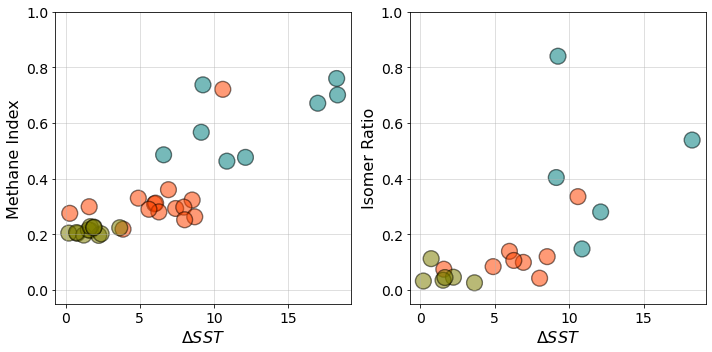

In [610]:
# Figure 5
fig, ax = plt.subplots(1, 2, figsize=(10, 5), facecolor="white")
ax = ax.flatten()
vals = ["MI index", "ratio"]

for i, j in enumerate(vals):
    sns.scatterplot(
        data=all_merge,
        x="delta_sst",
        hue="Location_x",
        y=j,
        ax=ax[i],
        palette=pal_2,
        edgecolor="k",
        alpha=0.1,
        s=250,
    )
    ax[i].tick_params(axis="x", labelsize=14)
    ax[i].tick_params(axis="y", labelsize=14)
    ax[i].set_ylim([-0.05, 1])

leg = [0, 1]
for k, l in enumerate(leg):
    ax[k].legend().remove()
    ax[k].set_xlabel("$\Delta SST$", fontsize=16)

# ax[0].axhline(y = 0.3)

ylabels = ["Methane Index", "Isomer Ratio"]
for n, m in enumerate(ylabels):
    ax[n].set_ylabel(m, fontsize=16)
    ax[n].grid("on", alpha=0.5)

plt.tight_layout()
plt.savefig("../manuscript-figures/SST_vs_ratio_MI.png", dpi=400)

In [611]:
# clculate percent error
# set true value to regional SST
true_value = 13
difference = true_value - df_index_vals["50th_percentile"]
abs_difference = abs(difference)
percent_error = abs_difference / true_value * 100
df_index_vals.loc[:, "Percent_Error"] = percent_error

In [612]:
# Set MI intervals
int = [0, 0.25, 0.41, 1]  # Example bin edges
int_labels = ["MI < 0.25", "0.25 < MI < 0.4", "MI > 0.4"]  # Example bin labels

# Assign data to intervals
df_index_vals["MI_Index_int"] = pd.cut(
    df_index_vals["MI index"], bins=int, labels=int_labels, retbins=False
)

In [613]:
additional_stats_sst = (
    df_index_vals.groupby("MI_Index_int")["delta_sst"]
    .agg(["mean", "median", "std", "min", "max", "count"])
    .reset_index()
)
print(additional_stats_sst)
additional_stats_error = (
    df_index_vals.groupby("MI_Index_int")["Percent_Error"]
    .agg(["mean", "median", "std", "min", "max", "count"])
    .reset_index()
)
print(additional_stats_error)

      MI_Index_int       mean   median       std     min      max  count
0        MI < 0.25   1.770886   1.6689  1.035871  0.2119   3.8665     14
1  0.25 < MI < 0.4   6.167886   6.6042  2.513669  0.2779   8.6973     14
2         MI > 0.4  12.456511  10.8620  4.333877  6.6011  18.3179      9
      MI_Index_int       mean     median        std        min         max  \
0        MI < 0.25  13.622198  12.837692   7.968241   1.630000   29.742308   
1  0.25 < MI < 0.4  47.445275  50.801538  19.335913   2.137692   66.902308   
2         MI > 0.4  95.819316  83.553846  33.337515  50.777692  140.906923   

   count  
0     14  
1     14  
2      9  


In [621]:
# Calculate CI via bootstrapping (95%)
np.random.seed(10)  # set random seed for reproducible results


def bootstrap_ci(data, n_bootstraps=1000):
    """Return the bootstrapped confidence interval for the mean of the data."""
    bootstrapped_means = []
    for i in range(n_bootstraps):
        # Sample with replacement and calculate the mean
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_means.append(np.mean(sample))

    # Calculate the confidence interval bounds
    lower_bound = np.percentile(bootstrapped_means, 2.5)
    upper_bound = np.percentile(bootstrapped_means, 97.5)

    return lower_bound, upper_bound


# Group the data by MI_Index_int and apply the bootstrap function
ci_results = df_index_vals.groupby("MI_Index_int")["delta_sst"].apply(
    lambda x: bootstrap_ci(x, n_bootstraps=1000)
)
ci_results_error = df_index_vals.groupby("MI_Index_int")["Percent_Error"].apply(
    lambda x: bootstrap_ci(x, n_bootstraps=1000)
)

# Print the results
print(ci_results)
print(ci_results_error)

MI_Index_int
MI < 0.25          (1.2787482142857145, 2.314502678571428)
0.25 < MI < 0.4      (4.786045178571429, 7.29062357142857)
MI > 0.4           (9.988996666666665, 15.315245833333334)
Name: delta_sst, dtype: object
MI_Index_int
MI < 0.25           (9.731059065934067, 17.91363873626374)
0.25 < MI < 0.4     (36.310234890109875, 56.5141195054945)
MI > 0.4           (74.66358333333332, 116.19464529914528)
Name: Percent_Error, dtype: object


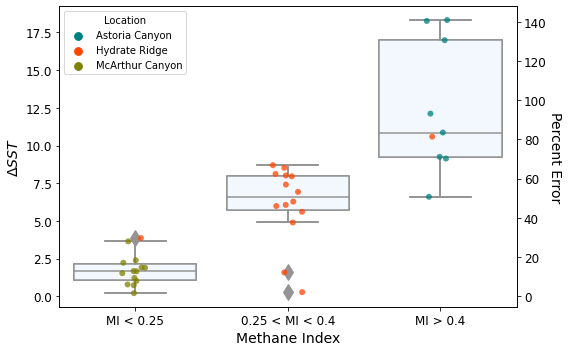

In [615]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 5))
ax1 = ax

sns.boxplot(
    x="MI_Index_int",
    y="delta_sst",
    data=df_index_vals,
    color="lightgray",
    fliersize=10,
    ax=ax1,
)

ax1_twin = ax1.twinx()
sns.boxplot(
    x="MI_Index_int",
    y="Percent_Error",
    data=df_index_vals,
    color="aliceblue",
    fliersize=12,
    ax=ax1_twin,
)
# Adding scatter points for Percent_Error
sns.stripplot(
    x="MI_Index_int",
    y="Percent_Error",
    hue="Location",
    data=df_index_vals,
    palette=["teal", "orangered", "olive"],
    edgecolor="k",
    size=6,
    alpha=0.75,
    jitter=True,
    ax=ax1_twin,
)

# Setting the labels and titles
ax1.set_xlabel("Methane Index", fontsize=14)
ax1.set_ylabel("$\Delta SST$", fontsize=14)
ax1_twin.set_ylabel("Percent Error", fontsize=14, rotation=270, labelpad=15)
ax1.tick_params(axis="x", labelsize=12)
ax1_twin.tick_params(axis="y", labelsize=12)
ax1.tick_params(axis="y", labelsize=12)

plt.tight_layout()
plt.savefig("../manuscript-figures/MI_box_plot.png", dpi=400)